In [1]:
#!pip install pandas transformers simpletransformers==0.41 amp

In [2]:
from DataHandler import DataHandler

csvTrainDataset ="train.csv"
csvValDataset = "validation.csv"
csvTestDataset = "test.csv"

#bertDir = projectDir+"/data/encoded/bert"
dh = DataHandler()
dfTrain = dh.readCSVData(csvTrainDataset)
dfVal = dh.readCSVData(csvValDataset)
dfTest = dh.readCSVData(csvTestDataset)

In [3]:
dfTrain

,screen_name,text,account.type,class_type
0,imranyebot,YEA now that note GOOD,bot,others
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn
...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human


In [4]:
# Select interesting columns for this study.
dfTrainDataset = dfTrain[["screen_name", "text", "account.type"]]
dfValDataset = dfVal[["screen_name", "text", "account.type"]]
dfTestDataset = dfTest[["screen_name", "text", "account.type"]]

In [5]:
dfTrainDataset

,screen_name,text,account.type
0,imranyebot,YEA now that note GOOD,bot
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human
2,zawarbot,wish i can i would be seeing other hoes on the...,bot
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot
...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot
20708,AINarendraModi,Land for their during the opportunity to the p...,bot
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human


In [6]:
X_train_all = dfTrainDataset.drop(columns=['screen_name'])
X_train_all.columns = ["text", "label"]

X_val_all = dfValDataset.drop(columns=['screen_name'])
X_val_all.columns = ["text", "label"]

X_test_all = dfTestDataset.drop(columns=['screen_name'])
X_test_all.columns = ["text", "label"]

dictLabels = {"human":0, "bot":1}
dictLabelsReverse = {0:"human", 1: "bot"}

X_train_all["label"] = X_train_all["label"].apply(lambda x: dictLabels[x])
X_val_all["label"] = X_val_all["label"].apply(lambda x: dictLabels[x])
X_test_all["label"] = X_test_all["label"].apply(lambda x: dictLabels[x])
y_train = X_train_all["label"]
y_val = X_val_all["label"]
y_test = X_test_all["label"]

In [7]:
train_labels = y_train.tolist()
val_labels = y_val.tolist()
test_labels = y_test.tolist()

In [8]:
#from simpletransformers.classification import ClassificationModel

#Create a ClassificationModel
#model = ClassificationModel('bert', 'bert-base-cased', args={'fp16': False, 'num_train_epochs': 3, "overwrite_output_dir":True}) #You can set class weights by using the optional weight argument

# Train the model
#model.train_model(X_train_all)

In [9]:
#model

In [10]:
import torch
#from simpletransformers.classification import ClassificationModel

In [11]:
#torch.save(model,"bert_base.pt")

In [12]:
#model = torch.load("Roberta_base.pt")


In [13]:
result=torch.load("Roberta_base_result_col.pt")


In [14]:
predictions=torch.load("Roberta_pred_col.pt")

In [15]:
#result = torch.load("Deep_BERT_result.pt")

In [16]:
result

{'mcc': 0.8045358959311424,
 'tp': 1154,
 'tn': 1154,
 'fp': 124,
 'fn': 126,
 'acc': 0.9022673964034402,
 'f1': 0.9022673964034401,
 'eval_loss': 0.46709161460712495}

In [17]:
# Evaluate the model
#import sklearn
#result, model_outputs, wrong_predictions = model.eval_model(X_test_all, acc=sklearn.metrics.accuracy_score, f1=sklearn.metrics.f1_score)

In [18]:
result

{'mcc': 0.8045358959311424,
 'tp': 1154,
 'tn': 1154,
 'fp': 124,
 'fn': 126,
 'acc': 0.9022673964034402,
 'f1': 0.9022673964034401,
 'eval_loss': 0.46709161460712495}

In [19]:
#torch.save(result,"BERT_base_result_col.pt")

In [20]:
X_test_all

,text,label
0,justin timberlake really one of the goats if y...,0
1,Thank you @PMBhutan for your gracious prayers ...,0
2,Theory: the number of red lights you will hit ...,0
3,Respects on the Upt of the I good with the peo...,1
4,Might give the BASIC #10Liner game contest ano...,0
...,...,...
2553,“The best kept secret,1
2554,Love the Choose your own adventure style of th...,0
2555,JOIN OUR TEAM: Sneezing,1
2556,These deeply discounted 256GB SanDisk flash dr...,0


In [21]:
#X_test_all["text"]

In [22]:
#X_test_all.dtypes

In [23]:
#predictions = model.predict(X_test_all["text"])[0]

In [24]:
#torch.save(predictions,"Deep_pred_col.pt")

In [25]:
import pandas as pd

predictionLabels = [dictLabelsReverse[t] for t in predictions]
dfResults = pd.DataFrame(predictionLabels, columns=["prediction"])
dfResults["orginal"] = dfTest[["account.type"]]
file_name = "distillbert_finetuning_new.csv"
dfResults.to_csv(file_name, sep='\t', encoding='utf-8')

In [26]:
dfResults

,prediction,orginal
0,bot,human
1,human,human
2,human,human
3,bot,bot
4,human,human
...,...,...
2553,bot,bot
2554,human,human
2555,bot,bot
2556,human,human


In [27]:
dfTest["label_distillbert"] = [dictLabelsReverse[t] for t in predictions]

In [27]:
def plotErrorRatio(X_test_all, prediction_column, min_sample_num=30):
    X_verify = X_test_all[["screen_name", "text", "account.type", prediction_column]]
    X_count_accounts = X_test_all[["screen_name", "account.type"]].groupby("screen_name").count()
    X_verify = X_verify[X_verify["account.type"] != X_verify[prediction_column]]
    X_verify = X_verify.groupby("screen_name").count()["text"].to_frame()
    X_verify["total"] = X_count_accounts["account.type"]
    X_verify.columns = ["errors", "num_samples"]
    X_verify["error_ratio"] = X_verify["errors"] / X_verify["num_samples"]
    X_verify[X_verify["num_samples"] >= min_sample_num]["error_ratio"].plot.bar(figsize=(15,5))
    return X_verify



confusion matrix


[[1154  124]
 [ 126 1154]]




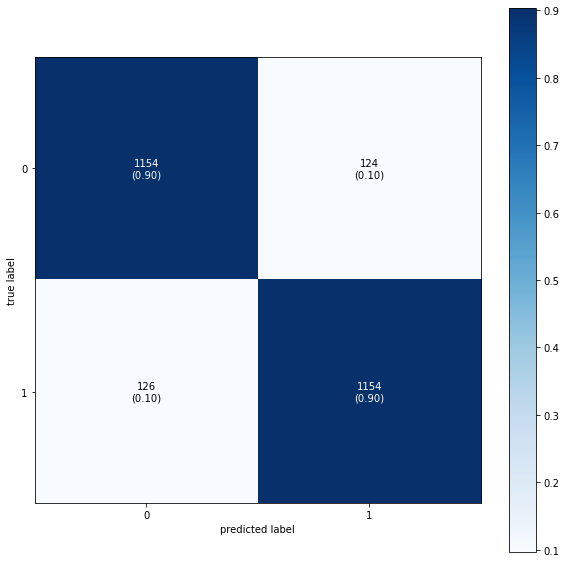

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(X_test_all['label'],predictions)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
plotErrorRatio(dfTest, "label_distillbert")

In [ ]:
X_test_all["text"]

In [ ]:
#!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
#!pip install anyio==3.5.0


In [ ]:
#!pip install starlette

In [ ]:
#!pip install sunpy

In [ ]:
#Interface

In [20]:
dfTestDatasetnew=dfTestDataset

In [21]:
dfTestDatasetnew.head()

,screen_name,text,account.type
0,zawvrk,justin timberlake really one of the goats if y...,human
1,narendramodi,Thank you @PMBhutan for your gracious prayers ...,human
2,ahadsheriff,Theory: the number of red lights you will hit ...,human
3,AINarendraModi,Respects on the Upt of the I good with the peo...,bot
4,kevinhooke,Might give the BASIC #10Liner game contest ano...,human


In [22]:
#Merge for ui use

In [23]:
merge = pd.concat([dfTestDatasetnew,dfResults], axis=1, join='inner')

In [24]:
merge=merge.drop_duplicates(subset='screen_name')

In [25]:
merge

,screen_name,text,account.type,prediction,orginal
0,zawvrk,justin timberlake really one of the goats if y...,human,bot,human
1,narendramodi,Thank you @PMBhutan for your gracious prayers ...,human,human,human
2,ahadsheriff,Theory: the number of red lights you will hit ...,human,human,human
3,AINarendraModi,Respects on the Upt of the I good with the peo...,bot,bot,bot
4,kevinhooke,Might give the BASIC #10Liner game contest ano...,human,human,human
5,imranyebot,Fifty Four Degrees sent it was,bot,bot,bot
6,DeepDrumpf,"Kansas They all said, “I don’t need anything. ...",bot,bot,bot
7,jaden,I Wanna See Some Rainbows Out There Boys,human,human,human
8,dril,"ive been known to look at 2, even 3 emails , a...",human,human,human
11,dril_gpt2,"there is a ""war on cows"" going on right now, b...",bot,bot,bot


In [26]:
import numpy as np

import gradio as gr
def test_1(Account_Name):
    number=dfTestDatasetnew[dfTestDatasetnew["screen_name"]==Account_Name].index
    index=number[0]
    return dfResults.iloc[[index]]
    
  
gr.Interface(fn=test_1, 
             inputs="text", 
             outputs="text"
            ).launch()

Running on local URL:  http://127.0.0.1:7861/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x295621e85b0>, 'http://127.0.0.1:7861/', None)

In [ ]:
############INTERFACE #####################

In [ ]:
pip install tkinder

In [ ]:
from tkinter import *


In [ ]:
root=Tk()
e=Entry(root,width=100)
e.pack()
def myclick():
    if(e.get()==merge["screen_name"].get()):
        myLabel=Label(root,text="hai")
    else:
        myLabel=Label(root,text="no hai")
        

    myLabel=Label(root,text=c.get())
    myLabel.pack()
myButton=Button(root,text="Check",command=myclick)
myButton.pack()
root.mainloop()